In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, Table, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
#I wanted to see some information about the table. 
# including key names and column names/ types

Base.classes.keys()

['measurement', 'station']

In [5]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

In [6]:
# Using the inspector to print the column names within the 'measurment' table and its types
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [7]:
# Using the inspector to print the column names within the 'station' table and its types
# the column containing temperatures is named "tobs"
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [8]:
# Import the sqlalchemy extract function.
from sqlalchemy import extract

# 1. Write a query that filters the Measurement table to retrieve the temperatures for the month of June.
# from the avbove info the column containing temperatures is named "tobs"
june_temps = []
june_temps = session.query(Measurement.date, Measurement.tobs).\
    filter(func.strftime("%m", Measurement.date) == "06").all()
    
june_temps


[('2010-06-01', 78.0),
 ('2010-06-02', 76.0),
 ('2010-06-03', 78.0),
 ('2010-06-04', 76.0),
 ('2010-06-05', 77.0),
 ('2010-06-06', 78.0),
 ('2010-06-07', 77.0),
 ('2010-06-08', 78.0),
 ('2010-06-09', 78.0),
 ('2010-06-10', 79.0),
 ('2010-06-11', 78.0),
 ('2010-06-12', 78.0),
 ('2010-06-13', 78.0),
 ('2010-06-14', 77.0),
 ('2010-06-15', 78.0),
 ('2010-06-16', 78.0),
 ('2010-06-17', 77.0),
 ('2010-06-18', 77.0),
 ('2010-06-19', 82.0),
 ('2010-06-20', 78.0),
 ('2010-06-21', 78.0),
 ('2010-06-22', 78.0),
 ('2010-06-23', 78.0),
 ('2010-06-24', 78.0),
 ('2010-06-25', 77.0),
 ('2010-06-26', 76.0),
 ('2010-06-27', 78.0),
 ('2010-06-28', 78.0),
 ('2010-06-29', 78.0),
 ('2010-06-30', 78.0),
 ('2011-06-01', 77.0),
 ('2011-06-02', 78.0),
 ('2011-06-03', 73.0),
 ('2011-06-04', 70.0),
 ('2011-06-05', 76.0),
 ('2011-06-06', 77.0),
 ('2011-06-07', 77.0),
 ('2011-06-08', 77.0),
 ('2011-06-09', 77.0),
 ('2011-06-10', 78.0),
 ('2011-06-11', 77.0),
 ('2011-06-12', 77.0),
 ('2011-06-13', 78.0),
 ('2011-06-

In [9]:
# 2. Convert the June temperatures to a list.
    # completed above

In [10]:
# 3. Create a DataFrame from the list of temperatures for the month of June. 
june_temps_df = pd.DataFrame(june_temps, columns=['date', 'June Temps'])

june_temps_df

,date,June Temps
0,2010-06-01,78.0
1,2010-06-02,76.0
2,2010-06-03,78.0
3,2010-06-04,76.0
4,2010-06-05,77.0
...,...,...
1695,2017-06-26,79.0
1696,2017-06-27,74.0
1697,2017-06-28,74.0
1698,2017-06-29,76.0


In [11]:
# 4. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temps_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


In [12]:
# 5. Return to your challenge instructions to compare your summary statistics
    # it appears i have replicated the table in the challenge instructions

## D2: Determine the Summary Statistics for December

In [13]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
december_temps = []

december_temps = session.query(Measurement.date, Measurement.tobs).\
    filter(func.strftime("%m", Measurement.date) == "12").all()
    
december_temps

[('2010-12-01', 76.0),
 ('2010-12-03', 74.0),
 ('2010-12-04', 74.0),
 ('2010-12-06', 64.0),
 ('2010-12-07', 64.0),
 ('2010-12-08', 67.0),
 ('2010-12-09', 77.0),
 ('2010-12-10', 66.0),
 ('2010-12-11', 69.0),
 ('2010-12-12', 68.0),
 ('2010-12-13', 68.0),
 ('2010-12-14', 71.0),
 ('2010-12-15', 74.0),
 ('2010-12-16', 67.0),
 ('2010-12-17', 66.0),
 ('2010-12-18', 69.0),
 ('2010-12-19', 71.0),
 ('2010-12-23', 70.0),
 ('2010-12-24', 70.0),
 ('2010-12-26', 74.0),
 ('2010-12-27', 74.0),
 ('2010-12-28', 71.0),
 ('2010-12-29', 75.0),
 ('2010-12-30', 75.0),
 ('2010-12-31', 72.0),
 ('2011-12-01', 69.0),
 ('2011-12-02', 68.0),
 ('2011-12-03', 73.0),
 ('2011-12-04', 74.0),
 ('2011-12-05', 73.0),
 ('2011-12-06', 73.0),
 ('2011-12-07', 73.0),
 ('2011-12-08', 73.0),
 ('2011-12-09', 71.0),
 ('2011-12-10', 73.0),
 ('2011-12-11', 73.0),
 ('2011-12-12', 77.0),
 ('2011-12-13', 72.0),
 ('2011-12-14', 71.0),
 ('2011-12-15', 73.0),
 ('2011-12-16', 70.0),
 ('2011-12-17', 73.0),
 ('2011-12-18', 69.0),
 ('2011-12-

In [14]:
# 7. Convert the December temperatures to a list.
    # completed above

In [15]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
december_temps_df = pd.DataFrame(december_temps, columns=["date", "December Temps"])

december_temps_df

,date,December Temps
0,2010-12-01,76.0
1,2010-12-03,74.0
2,2010-12-04,74.0
3,2010-12-06,64.0
4,2010-12-07,64.0
...,...,...
1512,2016-12-27,71.0
1513,2016-12-28,71.0
1514,2016-12-29,69.0
1515,2016-12-30,65.0


In [16]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
december_temps_df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [17]:
# 10. Return to your challenge instructions to compare your summary statistics
        # it appears i have replicated the table in the challenge instructions

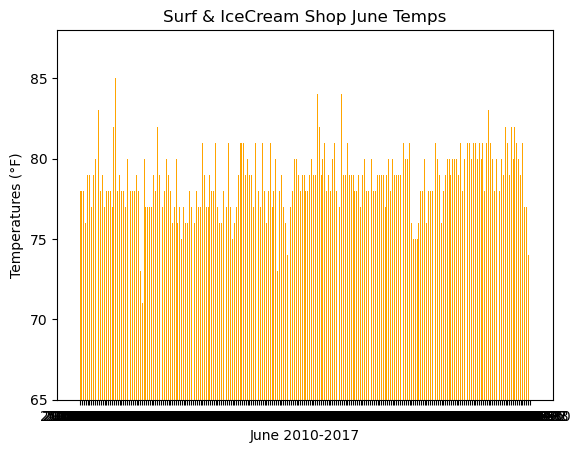

In [18]:
#I wanted to play around with a bar graph

x_axis = june_temps_df["date"]
y_axis = june_temps_df["June Temps"]

#june_temps.plot.bar()
plt.bar(x_axis, y_axis, width=.5, align='center',color="orange")
plt.xlabel("June 2010-2017")
plt.ylabel("Temperatures (°F)")
plt.title("Surf & IceCream Shop June Temps")
plt.ylim((65,88))

plt.savefig('June_Temps.png')

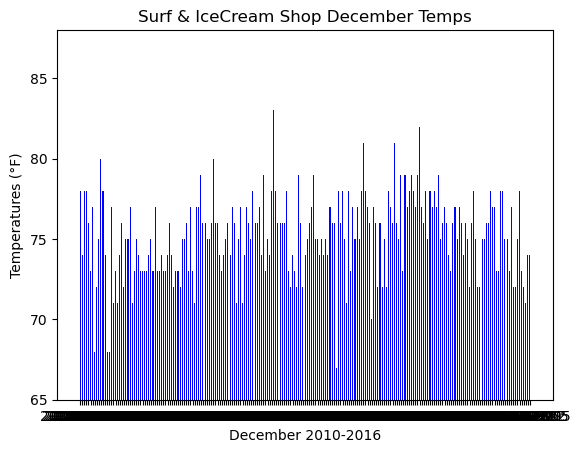

In [19]:

x_axis = december_temps_df["date"]
y_axis = december_temps_df["December Temps"]

#june_temps.plot.bar()
plt.bar(x_axis, y_axis, width=.5, align='center',color="blue")
plt.xlabel("December 2010-2016")
plt.ylabel("Temperatures (°F)")
plt.title("Surf & IceCream Shop December Temps")
plt.ylim((65,88))

plt.savefig('December_Temps.png')


In [20]:
# Addditional query #1
# I wanted to know the precipitation levels for June/ December to go along with the temps. 
# Would rain deter people from surfing or IceCream?
june_prcp = []
june_prcp = session.query(Measurement.date, Measurement.prcp).\
    filter(func.strftime("%m", Measurement.date) == "06").all()
    
june_prcp

[('2010-06-01', 0.0),
 ('2010-06-02', 0.01),
 ('2010-06-03', 0.0),
 ('2010-06-04', 0.0),
 ('2010-06-05', 0.0),
 ('2010-06-06', 0.0),
 ('2010-06-07', 0.0),
 ('2010-06-08', 0.0),
 ('2010-06-09', 0.0),
 ('2010-06-10', 0.0),
 ('2010-06-11', 0.0),
 ('2010-06-12', 0.0),
 ('2010-06-13', 0.0),
 ('2010-06-14', 0.0),
 ('2010-06-15', 0.0),
 ('2010-06-16', 0.0),
 ('2010-06-17', 0.0),
 ('2010-06-18', 0.0),
 ('2010-06-19', 0.0),
 ('2010-06-20', 0.0),
 ('2010-06-21', 0.0),
 ('2010-06-22', 0.0),
 ('2010-06-23', 0.0),
 ('2010-06-24', 0.0),
 ('2010-06-25', 0.0),
 ('2010-06-26', 0.02),
 ('2010-06-27', 0.0),
 ('2010-06-28', 0.0),
 ('2010-06-29', 0.0),
 ('2010-06-30', 0.0),
 ('2011-06-01', 0.07),
 ('2011-06-02', 0.0),
 ('2011-06-03', 0.56),
 ('2011-06-04', 0.89),
 ('2011-06-05', 0.0),
 ('2011-06-06', 0.0),
 ('2011-06-07', 0.0),
 ('2011-06-08', 0.03),
 ('2011-06-09', 0.01),
 ('2011-06-10', 0.0),
 ('2011-06-11', 0.0),
 ('2011-06-12', 0.0),
 ('2011-06-13', 0.0),
 ('2011-06-14', 0.0),
 ('2011-06-15', 0.0),
 ('

In [21]:
june_prcp_df = pd.DataFrame(june_prcp, columns=["Date", "June Precipitation"])
june_prcp_df

,Date,June Precipitation
0,2010-06-01,0.00
1,2010-06-02,0.01
2,2010-06-03,0.00
3,2010-06-04,0.00
4,2010-06-05,0.00
...,...,...
1695,2017-06-26,0.02
1696,2017-06-27,0.10
1697,2017-06-28,0.02
1698,2017-06-29,0.04


In [22]:
june_prcp_df.describe()

,June Precipitation
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


Text(0.5, 1.0, 'Surf & IceCream Shop June Precipitation')

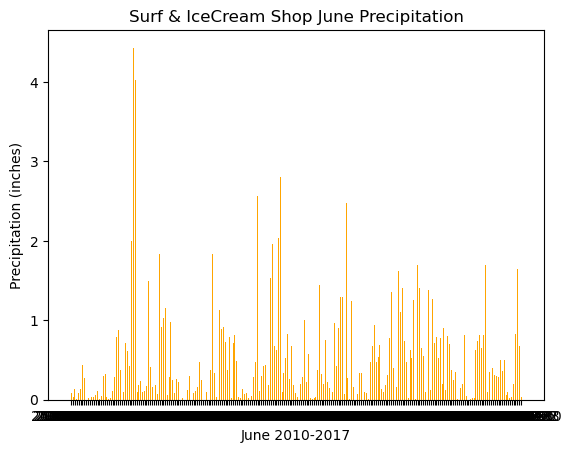

In [23]:
x_axis = june_prcp_df["Date"]
y_axis = june_prcp_df["June Precipitation"]

#june_temps.plot.bar()
plt.bar(x_axis, y_axis, width=.5, align='center',color="orange")
plt.xlabel("June 2010-2017")
plt.ylabel("Precipitation (inches)")
plt.title("Surf & IceCream Shop June Precipitation")


#plt.savefig('June_Prcp.png')

In [24]:
december_prcp = []
december_prcp = session.query(Measurement.date, Measurement.prcp).\
    filter(func.strftime("%m", Measurement.date) == "12").all()
    
december_prcp

[('2010-12-01', 0.04),
 ('2010-12-03', 0.0),
 ('2010-12-04', 0.0),
 ('2010-12-06', 0.0),
 ('2010-12-07', 0.0),
 ('2010-12-08', 0.0),
 ('2010-12-09', 0.0),
 ('2010-12-10', 1.58),
 ('2010-12-11', 0.77),
 ('2010-12-12', 0.0),
 ('2010-12-13', 0.0),
 ('2010-12-14', 0.0),
 ('2010-12-15', 0.0),
 ('2010-12-16', 0.0),
 ('2010-12-17', 0.0),
 ('2010-12-18', 0.0),
 ('2010-12-19', 1.4),
 ('2010-12-23', 0.0),
 ('2010-12-24', 0.0),
 ('2010-12-26', None),
 ('2010-12-27', 0.13),
 ('2010-12-28', 0.55),
 ('2010-12-29', 0.06),
 ('2010-12-30', 0.01),
 ('2010-12-31', 0.0),
 ('2011-12-01', 0.03),
 ('2011-12-02', 0.08),
 ('2011-12-03', 0.0),
 ('2011-12-04', 0.0),
 ('2011-12-05', 0.0),
 ('2011-12-06', 0.0),
 ('2011-12-07', 0.0),
 ('2011-12-08', 0.0),
 ('2011-12-09', 0.13),
 ('2011-12-10', 0.07),
 ('2011-12-11', 0.07),
 ('2011-12-12', 0.08),
 ('2011-12-13', 0.4),
 ('2011-12-14', 0.7),
 ('2011-12-15', 0.0),
 ('2011-12-16', 0.01),
 ('2011-12-17', 0.07),
 ('2011-12-18', 0.02),
 ('2011-12-19', 0.15),
 ('2011-12-20'

In [25]:
december_prcp_df = pd.DataFrame(december_prcp, columns=["Date", "December Precipitation"])
december_prcp_df

,Date,December Precipitation
0,2010-12-01,0.04
1,2010-12-03,0.00
2,2010-12-04,0.00
3,2010-12-06,0.00
4,2010-12-07,0.00
...,...,...
1512,2016-12-27,0.14
1513,2016-12-28,0.14
1514,2016-12-29,1.03
1515,2016-12-30,2.37


In [26]:
december_prcp_df.describe()

,December Precipitation
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


Text(0.5, 1.0, 'Surf & IceCream Shop December Precipitation')

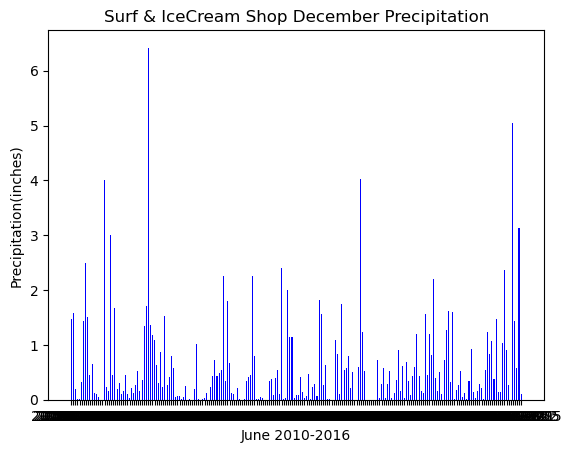

In [27]:
x_axis = december_prcp_df["Date"]
y_axis = december_prcp_df["December Precipitation"]

#june_temps.plot.bar()
plt.bar(x_axis, y_axis, width=.5, align='center',color="blue")
plt.xlabel("June 2010-2016")
plt.ylabel("Precipitation(inches)")
plt.title("Surf & IceCream Shop December Precipitation")


#plt.savefig('December_Prcp.png')

In [28]:
# I would like to see all temp for the entire data set... is there any trends?
all_temps = []

all_temps = session.query(Measurement.date, Measurement.tobs).all()

all_temps

[('2010-01-01', 65.0),
 ('2010-01-02', 63.0),
 ('2010-01-03', 74.0),
 ('2010-01-04', 76.0),
 ('2010-01-06', 73.0),
 ('2010-01-07', 70.0),
 ('2010-01-08', 64.0),
 ('2010-01-09', 68.0),
 ('2010-01-10', 73.0),
 ('2010-01-11', 64.0),
 ('2010-01-12', 61.0),
 ('2010-01-14', 66.0),
 ('2010-01-15', 65.0),
 ('2010-01-16', 68.0),
 ('2010-01-17', 64.0),
 ('2010-01-18', 72.0),
 ('2010-01-19', 66.0),
 ('2010-01-20', 66.0),
 ('2010-01-21', 69.0),
 ('2010-01-22', 67.0),
 ('2010-01-23', 67.0),
 ('2010-01-24', 71.0),
 ('2010-01-25', 67.0),
 ('2010-01-26', 76.0),
 ('2010-01-27', 68.0),
 ('2010-01-28', 72.0),
 ('2010-01-30', 70.0),
 ('2010-01-31', 67.0),
 ('2010-02-01', 66.0),
 ('2010-02-03', 67.0),
 ('2010-02-04', 69.0),
 ('2010-02-05', 67.0),
 ('2010-02-06', 67.0),
 ('2010-02-07', 64.0),
 ('2010-02-08', 69.0),
 ('2010-02-09', 73.0),
 ('2010-02-11', 73.0),
 ('2010-02-12', 69.0),
 ('2010-02-13', 69.0),
 ('2010-02-14', 69.0),
 ('2010-02-15', 71.0),
 ('2010-02-16', 61.0),
 ('2010-02-17', 69.0),
 ('2010-02-

In [29]:
all_temps_df = pd.DataFrame(all_temps, columns=["date", "temps"])

all_temps_df.set_index(all_temps_df["date"], inplace=True)
     
all_temps_df

,date,temps
date,,
2010-01-01,2010-01-01,65.0
2010-01-02,2010-01-02,63.0
2010-01-03,2010-01-03,74.0
2010-01-04,2010-01-04,76.0
2010-01-06,2010-01-06,73.0
...,...,...
2017-08-19,2017-08-19,71.0
2017-08-20,2017-08-20,78.0
2017-08-21,2017-08-21,76.0


In [30]:
all_temps_df.drop("date", axis=1, inplace=True)
all_temps_df

,temps
date,
2010-01-01,65.0
2010-01-02,63.0
2010-01-03,74.0
2010-01-04,76.0
2010-01-06,73.0
...,...
2017-08-19,71.0
2017-08-20,78.0
2017-08-21,76.0


In [32]:
all_temps_df.describe()

,temps
count,19550.000000
mean,73.097954
std,4.523527
min,53.000000
25%,70.000000
50%,73.000000
75%,76.000000
max,87.000000


In [34]:
# Find temps of first year in dataset
first_year_temps = []

first_year_temps = session.query(Measurement.date, Measurement.tobs).\
    filter(func.strftime("%Y", Measurement.date) == "2010").all()
    
first_year_temps


[('2010-01-01', 65.0),
 ('2010-01-02', 63.0),
 ('2010-01-03', 74.0),
 ('2010-01-04', 76.0),
 ('2010-01-06', 73.0),
 ('2010-01-07', 70.0),
 ('2010-01-08', 64.0),
 ('2010-01-09', 68.0),
 ('2010-01-10', 73.0),
 ('2010-01-11', 64.0),
 ('2010-01-12', 61.0),
 ('2010-01-14', 66.0),
 ('2010-01-15', 65.0),
 ('2010-01-16', 68.0),
 ('2010-01-17', 64.0),
 ('2010-01-18', 72.0),
 ('2010-01-19', 66.0),
 ('2010-01-20', 66.0),
 ('2010-01-21', 69.0),
 ('2010-01-22', 67.0),
 ('2010-01-23', 67.0),
 ('2010-01-24', 71.0),
 ('2010-01-25', 67.0),
 ('2010-01-26', 76.0),
 ('2010-01-27', 68.0),
 ('2010-01-28', 72.0),
 ('2010-01-30', 70.0),
 ('2010-01-31', 67.0),
 ('2010-02-01', 66.0),
 ('2010-02-03', 67.0),
 ('2010-02-04', 69.0),
 ('2010-02-05', 67.0),
 ('2010-02-06', 67.0),
 ('2010-02-07', 64.0),
 ('2010-02-08', 69.0),
 ('2010-02-09', 73.0),
 ('2010-02-11', 73.0),
 ('2010-02-12', 69.0),
 ('2010-02-13', 69.0),
 ('2010-02-14', 69.0),
 ('2010-02-15', 71.0),
 ('2010-02-16', 61.0),
 ('2010-02-17', 69.0),
 ('2010-02-

In [35]:
first_year_temps_df = pd.DataFrame(first_year_temps, columns=["date", "2010 temps"])

first_year_temps_df

,date,2010 temps
0,2010-01-01,65.0
1,2010-01-02,63.0
2,2010-01-03,74.0
3,2010-01-04,76.0
4,2010-01-06,73.0
...,...,...
2779,2010-12-27,71.0
2780,2010-12-28,70.0
2781,2010-12-29,71.0
2782,2010-12-30,70.0


In [36]:
first_year_temps_df.describe()

,2010 temps
count,2784.000000
mean,72.495690
std,4.117915
min,56.000000
25%,70.000000
50%,73.000000
75%,76.000000
max,87.000000


In [46]:
# find temps for the last year in data set
# 2017 was in incomplete year of data. lets go with 2016
last_year_temps = session.query(Measurement.date, Measurement.tobs).\
    order_by(Measurement.date).\
    filter(func.strftime("%Y", Measurement.date) == "2016").all()

last_year_temps


[('2016-01-01', 62.0),
 ('2016-01-01', 63.0),
 ('2016-01-01', 73.0),
 ('2016-01-01', 64.0),
 ('2016-01-01', 74.0),
 ('2016-01-01', 73.0),
 ('2016-01-02', 71.0),
 ('2016-01-02', 73.0),
 ('2016-01-02', 73.0),
 ('2016-01-02', 73.0),
 ('2016-01-02', 72.0),
 ('2016-01-02', 69.0),
 ('2016-01-03', 63.0),
 ('2016-01-03', 71.0),
 ('2016-01-03', 75.0),
 ('2016-01-03', 69.0),
 ('2016-01-03', 68.0),
 ('2016-01-03', 65.0),
 ('2016-01-04', 62.0),
 ('2016-01-04', 72.0),
 ('2016-01-04', 76.0),
 ('2016-01-04', 76.0),
 ('2016-01-04', 69.0),
 ('2016-01-04', 62.0),
 ('2016-01-05', 68.0),
 ('2016-01-05', 68.0),
 ('2016-01-05', 74.0),
 ('2016-01-05', 75.0),
 ('2016-01-05', 70.0),
 ('2016-01-05', 69.0),
 ('2016-01-06', 73.0),
 ('2016-01-06', 70.0),
 ('2016-01-06', 74.0),
 ('2016-01-06', 74.0),
 ('2016-01-06', 69.0),
 ('2016-01-06', 68.0),
 ('2016-01-07', 65.0),
 ('2016-01-07', 71.0),
 ('2016-01-07', 73.0),
 ('2016-01-07', 68.0),
 ('2016-01-07', 76.0),
 ('2016-01-07', 64.0),
 ('2016-01-08', 67.0),
 ('2016-01-

In [49]:
last_year_temps_df = pd.DataFrame(last_year_temps, columns=["date", "2016 temps"])

last_year_temps_df

,date,2016 temps
0,2016-01-01,62.0
1,2016-01-01,63.0
2,2016-01-01,73.0
3,2016-01-01,64.0
4,2016-01-01,74.0
...,...,...
2304,2016-12-31,66.0
2305,2016-12-31,71.0
2306,2016-12-31,72.0
2307,2016-12-31,67.0


In [50]:
last_year_temps_df.describe()

,2016 temps
count,2309.000000
mean,74.144218
std,4.469373
min,56.000000
25%,71.000000
50%,75.000000
75%,78.000000
max,84.000000
